# Using DeepWalk GloVe to embed Cora
In this tutorial, we will see how to use the DeepWalk GloVe
node embedding method to compute embedding of the Cora graph.
We will retrieve the graph, compute its report, and the get visualizations, both
single-plot, complete and animated.

We will show how to get visualizations both using the most immediate
approach, simply using the `GraphVisualizer` object with the embedding method
name, and the slightly longer approach creating the embedding model and
computing the embedding.

Of note, GRAPE provides a single implementation of the DeepWalk GloVe 
model, using as backend the Ensmallen library.

## Installing the library
First of all, to install GRAPE just run as usual:

```bash
pip install grape
```

In [1]:
!pip install -qU grape

## Retrieving the graph
To retrieve the Cora graph from the linqs graph repository
we run the following line of code:

In [2]:
from grape.datasets.linqs import Cora
graph = Cora()

Do note that we support the retrieval of many other graphs, 83644 at the time of writing,
and you just need to import the graph you desire from the `datasets` submodule.

Remember that you can peruse the complete list of available graphs by running:

In [3]:
from grape.datasets import get_all_available_graphs_dataframe
all_available_graphs_dataframe = get_all_available_graphs_dataframe(verbose=False)
all_available_graphs_dataframe

,repository,name,version
0,pheknowlatorkg,PheKnowLator,v2.0.0-2020-5-10.instance-inverseRelations-owl
1,pheknowlatorkg,PheKnowLator,v2.0.0-2020-5-10.instance-inverseRelations-owl...
2,pheknowlatorkg,PheKnowLator,v2.0.0-2020-5-10.instance-relationsOnly-owl
3,pheknowlatorkg,PheKnowLator,v2.0.0-2020-5-10.instance-relationsOnly-owlnets
4,pheknowlatorkg,PheKnowLator,v2.0.0-2020-5-10.subclass-inverseRelations-owl
...,...,...,...
83639,wikidata,WikiData,wikidata-20220713-truthy-BETA
83640,wikidata,WikiData,wikidata-20220715-lexemes-BETA
83641,wikidata,WikiData,latest-all
83642,wikidata,WikiData,latest-lexemes


Now, in the retrieved version of the Cora graph we find both nodes representing the
papers and nodes representing words present in the paper abstracts.

In most benchmarks, only the topology represented by the paper nodes is used and therefore
we run a filter that splits the graph into the topology of exclusively the paper nodes and
a dataframe containing the one-hot encoded words vectors.

In [4]:
from grape.datasets.linqs import get_words_data
graph, node_features = get_words_data(graph)

## Graph report
Let's proceed to compute the graph report, which includes both the ordinary topological
information, such as the number of edges and number of nodes, number of connectes components
and number of singletons, plus many topological oddities.

In [5]:
graph

<div class="graph-report"><style>.graph-report li {margin: 0.5em 0 0.5em 0;}.graph-report .paragraph {text-align: justify;word-break: break-all;}.graph-report .small-columns {column-count: 4;column-gap: 2em;}.graph-report .medium-columns {column-count: 3;column-gap: 2em;}.graph-report .large-columns {column-count: 2;column-gap: 2em;}.graph-report .single-column {}@media only screen and (max-width: 600px) {.graph-report .small-columns {column-count: 1;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 600px) and (max-width: 800px) {.graph-report .small-columns {column-count: 2;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 800px) and (max-width: 1024px) {.graph-report .small-columns {column-count: 3;}.graph-report .medium-columns {column-count: 2;}.graph-report .large-columns {column-count: 1;}}</style><h2>Cora</h2><p class="paragraph">The undirected graph Cora has 2.71K heterogeneous nodes and 5.28K edges. The graph contains 78 connected components, with the largest one containing 2.48K nodes and the smallest one containing 2 nodes. The RAM requirements for the nodes and edges data structures are 207.68KB and 16.34KB respectively.</p><h3 style="margin: 1em 0 0 0;">Degree centrality</h3><p class="paragraph">The minimum node degree is 1, the maximum node degree is 168, the mode degree is 2, the mean degree is 3.90 and the node degree median is 3.</p><p class="paragraph">The nodes with the highest degree centrality are 35 (degree 168 and node type Genetic_Algorithms), 6213 (degree 78 and node type Reinforcement_Learning), 1365 (degree 74 and node type Neural_Networks), 3229 (degree 65 and node type Neural_Networks) and 910 (degree 44 and node type Neural_Networks).</p><h3 style="margin: 1em 0 0 0;">Node types</h3><p class="paragraph">The graph has 7 node types, which are Neural_Networks (818 nodes, 30.21%), Probabilistic_Methods (426 nodes, 15.73%), Genetic_Algorithms (418 nodes, 15.44%), Theory (351 nodes, 12.96%), Case_Based (298 nodes, 11.00%), Reinforcement_Learning (217 nodes, 8.01%) and Rule_Learning (180 nodes, 6.65%). The RAM requirement for the node types data structure is 141.72KB.</p><h3 style="margin: 1em 0 0 0;">Topological Oddities</h3><p class="paragraph">A topological oddity is a set of nodes in the graph that <i>may be derived</i> by an error during the generation of the edge list of the graph and, depending on the task, could bias the results of topology-based models. In the following paragraph, we will describe the detected topological oddities.</p><h4 style="margin: 1em 0 0 0;">Node tuples</h4><p class="paragraph">A node tuple is a connected component composed of two nodes. We have detected 57 node tuples in the graph, involving a total of 114 nodes (4.21%) and 57 edges (0.54%). The detected node tuples are:</p><ul class="medium-columns"><li><p class="paragraph">Node tuple containing the nodes 1105622 (node type Neural_Networks) and 430574 (node type Neural_Networks).</p></li>
<li><p class="paragraph">Node tuple containing the nodes 116512 (node type Neural_Networks) and 1107808 (node type Neural_Networks).</p></li>
<li><p class="paragraph">Node tuple containing the nodes 1107728 (node type Neural_Networks) and 115188 (node type Neural_Networks).</p></li>
<li><p class="paragraph">Node tuple containing the nodes 1136040 (node type Neural_Networks) and 754594 (node type Neural_Networks).</p></li>
<li><p class="paragraph">Node tuple containing the nodes 73972 (node type Case_Based) and 50980 (node type Case_Based).</p></li>
<li><p class="paragraph">Node tuple containing the nodes 628458 (node type Neural_Networks) and 628459 (node type Neural_Networks).</p></li>
<li><p class="paragraph">Node tuple containing the nodes 180301 (node type Probabilistic_Methods) and 1110628 (node type Probabilistic_Methods).</p></li>
<li><p class="paragraph">Node tuple c

## Graph visualizations
In GRAPE we support the visualization of a wide variety of graph properties,
which may either visualized through PCA, TSNE or UMAP decompositions, as a single plot
per property or as a composite plot. Furthermore, single plots may animated through
a high-dimensional rotation that allows for a more comprensive view of the embedding
decompositions.

### Computing embedding and plotting the node types
We start by showing how to use the `GraphVisualizer` object to compute in a few lines of code
a provided node embedding method, and to use the TSNE decomposition to display the node
types both in 2D and 4D. The 4D animation is achieved by executing a 4D decomposition,
rotating the decomposition in 4D and then plot the first 3 dimensions in a 3-dimensional plot.

In [6]:
from grape.embedders import DeepWalkGloVeEnsmallen
embedding = DeepWalkGloVeEnsmallen().fit_transform(graph)

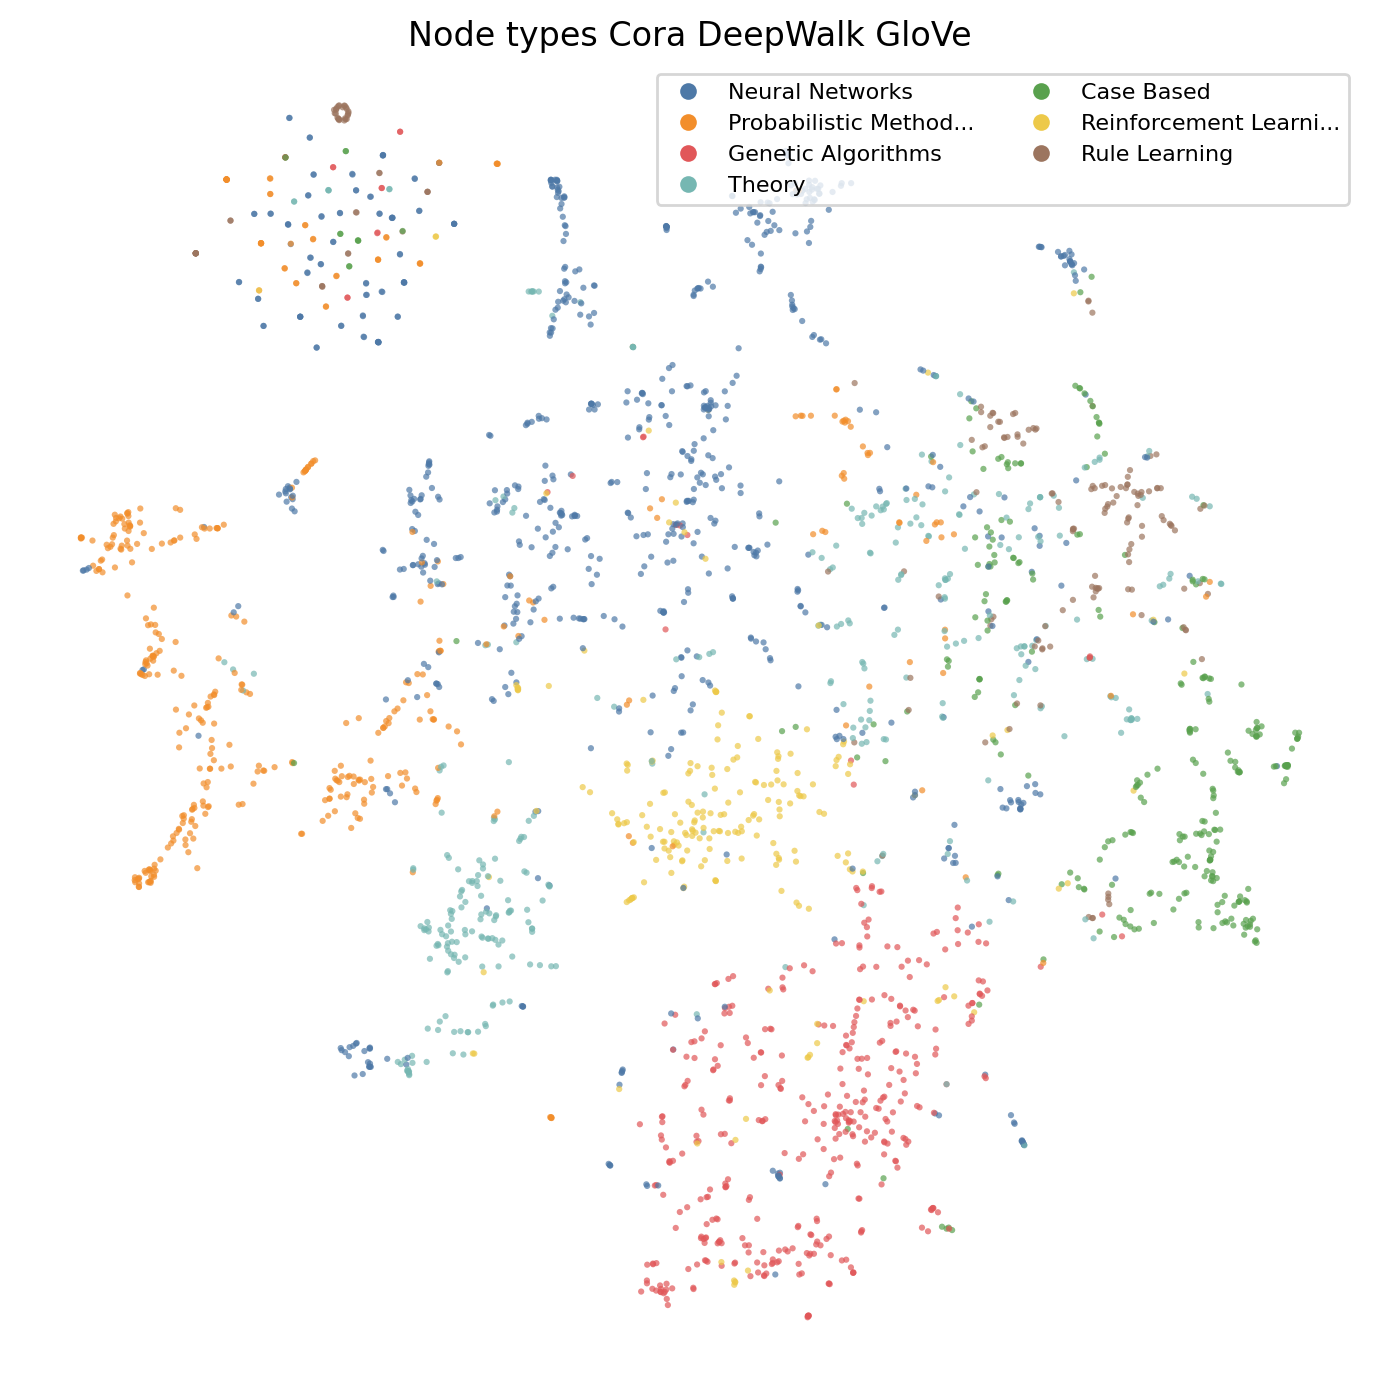

In [7]:
from grape import GraphVisualizer
visualizer = GraphVisualizer(graph)

# You can either provide the model name
#visualizer.fit_nodes("DeepWalk GloVe", library_name="Ensmallen")
# Or provide a precomputed embedding
#
# visualizer.fit_nodes(numpy_array_with_embedding)
# visualizer.fit_nodes(pandas_dataframe_with_embedding)
#
# or alternatively provide the model to be used:
#
# from grape.embedders import DeepWalkGloVeEnsmallen
# visualizer.fit_nodes(DeepWalkGloVeEnsmallen())
#
# In this tutorial, we use the embedding we have just computed above:

visualizer.fit_nodes(embedding)

# And now we can visualize the node types:
visualizer.plot_node_types()

For the 4D animation we will be rendering a webm,
but most video formats are supported. Analogously to the bidimensional
image, we run:

In [8]:
visualizer = GraphVisualizer(
    graph,
    n_components=4,
    rotate=True
)
visualizer.fit_nodes(embedding)
visualizer.plot_node_types()

OpenCV: FFMPEG: tag 0x30387076/'vp80' is not supported with codec id 139 and format 'webm / WebM'


To obtain instead the complete plot with all of the properties visualized,
you may run the following one-liner:

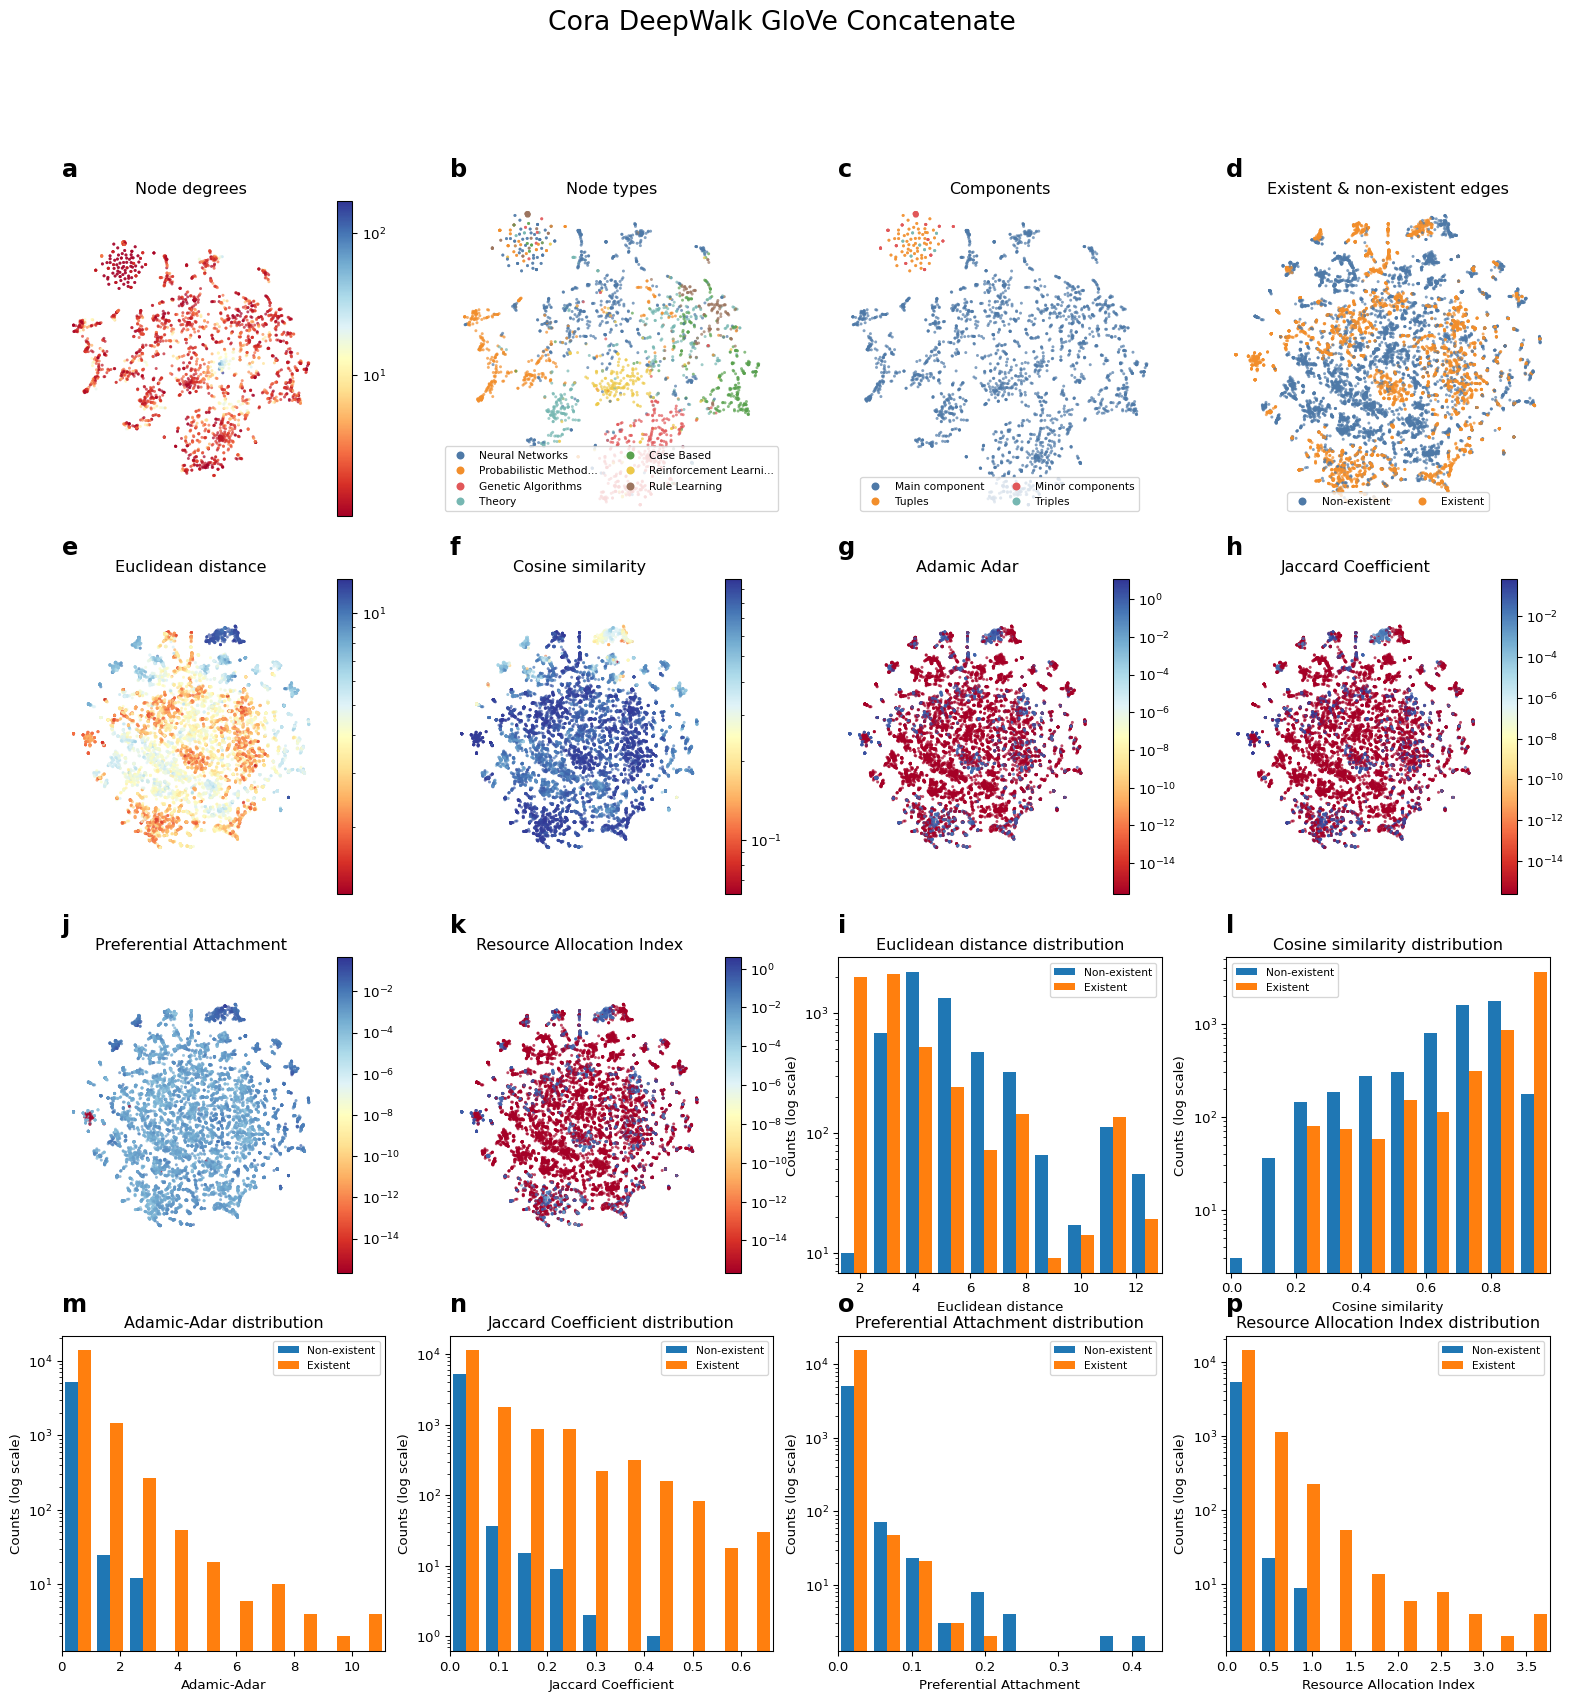

In [9]:
GraphVisualizer(graph).fit_and_plot_all(embedding)
        